1\. **Radioactive decay chain**

${\rm Tl}^{208}$ decays to ${\rm Pb}^{208}$ with a half-lieve of 3.052 minutes. Suppose to start with a sample of 1000 Thallium atoms and 0 of Lead atoms.

* Take steps in time of 1 second and at each time-step decide whether each Tl atom has decayed or not, accordingly to the probability $p(t)=1-2^{-t/\tau}$. Subtract the total number of Tl atoms that decayed at each step from the Tl sample and add them to the Lead one. Plot the evolution of the two sets as a function of time  
* Repeat the exercise by means of the inverse transform method: draw 1000 random numbers from the non-uniform probability distribution $p(t)=2^{-t/\tau}\frac{\ln 2}{\tau}$ to represent the times of decay of the 1000 Tl atoms. Make a plot showing the number of atoms that have not decayed as a function of time

Half life: 183.12
501
1827


Text(0.5, 1.0, 'Evolution over time')

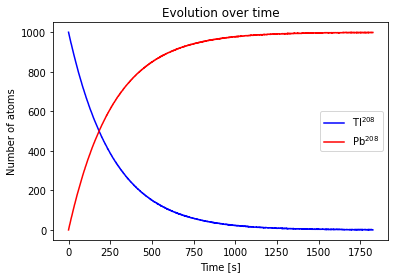

In [3]:
import numpy as np
import pandas as pd
from scipy import stats
import scipy.integrate as integrate
import matplotlib.pyplot as plt
import seaborn as sns

Tl_initial=1000
Pb_initial=0
step=1 
half_life= 3.052*60
print('Half life:',half_life)
Tl_over_time=np.zeros(0)
Tl_over_time=np.append(Tl_over_time,Tl_initial)
Pb_over_time=np.zeros(0)
Pb_over_time=np.append(Pb_over_time,Pb_initial)
def prob_decay(t,mu=half_life):
    return 1-np.power(2,-t/mu)

Tl_over_time= []
Pb_over_time= []

for i in range(3000):
    Tl_not_decayed = Tl_initial-int(Tl_initial*prob_decay(i)+np.random.randint(2))
    Pb_in_the_set = Pb_initial+int(Tl_initial*prob_decay(i)+np.random.randint(2))
    Tl_over_time.append(Tl_not_decayed)
    Pb_over_time.append(Pb_in_the_set)
    if Tl_not_decayed==0:
        break
    
plt.plot(Tl_over_time,'b', Pb_over_time,'r')

print(Tl_over_time[183])
print(len(Tl_over_time))
plt.legend(('Tl$^{208}$', 'Pb$^{208}$'), loc='best')
plt.xlabel('Time [s]')
plt.ylabel('Number of atoms')
plt.title('Evolution over time')

495.5009218625899


Text(0, 0.5, 'Probability')

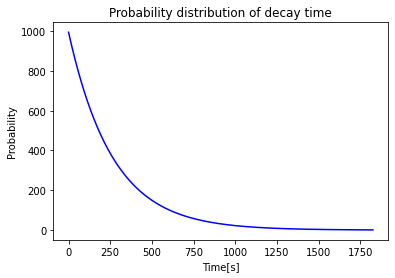

In [53]:
half_life= 3.052*60

def expon_pdf(t, mu=half_life):
    """PDF of exponential distribution."""
    return np.exp2(-t/mu)*np.log(2)/mu
a=[]
c=1000
b=expon_pdf(np.arange(1827))*1000
for i in range(1827):
    c=c-b[i]
    a.append(c)

print(a[184])

plt.plot(np.arange(1827), a,'b')
plt.title('Probability distribution of decay time')
plt.xlabel('Time[s]')
plt.ylabel('Probability')

2\. **Rutherford Scattering**

The scattering angle $\theta$ of $\alpha$ particles hitting a positively charged nucleus of a Gold atom ($Z=79$) follows the rule:

$$
\tan{\frac{1}{2} \theta} = \frac{Z e^2} {2\pi \epsilon_0 E b}
$$

where $E=7.7$ MeV and $b$ beam is the impact parameter. The beam is represented by a 2D gaussian distribution with $\sigma=a_0/100$ for both coordinates ($a_0$ being the Bohr radius). Assume 1 million $\alpha$ particles are shot on the gold atom.

Computing the fraction of particles that "bounce back",i.e. those particle whose scattering angle is greater than $\pi/2$ (which set a condition on the impact parameter $b$)

In [15]:
import scipy.constants as sc
Z=79
E=7.7*10**6*sc.e
N= 10**6
std= sc.physical_constants['Bohr radius'][0]/100


z = np.random.rand(N)
b = np.sqrt(-2*std**(2)*np.log(1-z))
const=Z*(sc.e)**2/(2*np.pi*sc.epsilon_0*E*b)
print(const)
theta = 2*np.arctan(const)
print('Fraction of particles that bounce back:',len(theta[theta>np.pi/2])/N)
sc.physical_constants['Bohr radius']

[0.06215285 0.05165821 0.04872955 ... 0.05029721 0.03626666 0.01761484]
Fraction of particles that bounce back: 0.001543


(5.29177210903e-11, 'm', 8e-21)

3\. **Monte Carlo integration: hit/miss vs mean value method**

Consider the function 

$$f(x) =\sin^2{\frac{1}{x(2-x)}}$$

* Compute the integral of $f(x)$ between 0 and 2 with the hit/miss method. Evaluate the error of your estimate
* Repeat the integral with the mean value method. Evaluate the error and compare it with the previous one

In [16]:
import scipy.integrate as integrate
def f(x):
    return (np.sin(1/(x*(2-x))))**2

I_true=integrate.quad(f,0,2,limit=10000)
print("True integral from 0 to 2:",I_true[0])
print('Estimate of the absolute error on the result:',I_true[1])

True integral from 0 to 2: 1.4514014971676978
Estimate of the absolute error on the result: 2.461256014552049e-07


c:\users\francesco\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:5: IntegrationWarning: The maximum number of subdivisions (10000) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  """


In [17]:
# Monte Carlo integration HIT_MISS
N=10000
count=0
values = []

for i in range(N):
    x=2*np.random.random()
    y=np.random.random()
    if y<f(x): count+=1
I=2*count/N
print("Estimated integral with HIT MISS method:",I)
print("Error with hit miss:",np.abs(I_true[0]-I), '\n')

for i in range(N):
    x=2*np.random.random()
    values = np.append(values,f(x))
I_est=2*np.sum(values)/N
print("Estimsted integral with MEAN VALUE method:",I_est)
print("Error using mean value:",np.abs(I_est-I_true[0])) 

Estimated integral with HIT MISS method: 1.4424
Error with hit miss: 0.009001497167697936 

Estimsted integral with MEAN VALUE method: 1.4530334346292428
Error using mean value: 0.0016319374615449966


4\. **Monte Carlo integration in high dimension**

* Start of by computing the area of a circle of unit radius, by integrating the function 

$$
f(x,y)=
\left\{
\begin{array}{ll}
      1 & x^2+y^2\le 1 \\
      0 & {\rm elsewhere}
\end{array} 
\right.
$$

* Generalize the result for a 10D sphere



In [14]:
radius = 1
N = 100000
dim =2

def MC_integration_2D(N, radius):
    res = 0
    for i in range(N):
        x = np.random.random(dim)
        if (x[0]**2 + x[1]**2) < radius:
            res += 1
    return 4*((radius * res)/N)



def MC_integration_ND(N, dim, radius):
    res = 0
    for i in range(N):
        x = np.random.random(dim)
        if x.dot(x.T) < radius:
            res += 1
    return ((2*radius)**dim)*(res/N)

print("Circle Area: ", MC_integration_2D(N, radius))
print("10D Sphere Area: ", MC_integration_ND(N, 10, radius))

Circle Area:  3.14596
10D Sphere Area:  2.72384


5\. **Monte Carlo integration with importance sampling** 

Calculate the value of the integral:

$$
I=\int_0^1 \frac{x^{-1/2}}{e^x+1} dx
$$

using the importance sampling method with $w(x)=1/\sqrt{x}$. You should get a result about 0.84

In [8]:
def f(x):
    return x**(-0.5)/(np.exp(x)+1)

def w(x):
    """PDF of exponential distribution."""
    return 1/x**(-0.5)

def int_weight(a,b):
        return (2*(b**(0.5)-a**(0.5)))


#WITH IMPORTANCE SAMPLING
N=10000
x=np.random.random(N)
a = 0   
b = 1
I_est=np.sum(f(x)*w(x))*int_weight(a,b)/N
I_true=integrate.quad(f,0,1)
print('True integral:',I_true)
print("Estimated integral:", I_est)
print('Error:',np.abs(I_true[0]-I_est))

True integral: (0.8389329600133838, 1.9939605522267811e-13)
Estimated integral: 0.7585211264985585
Error: 0.08041183351482528


In [9]:
#WITH MEAN VALUE METHOD
x=np.random.random(N)
#integral of w(x) in the domain
V=1
I_est=1/N*np.sum(f(x))*V
I_true=integrate.quad(f,0,1)
print('True integral:',I_true)
print("Estimated integral:", I_est)
print('Error:',np.abs(I_true[0]-I_est))

True integral: (0.8389329600133838, 1.9939605522267811e-13)
Estimated integral: 0.8532478138488357
Error: 0.014314853835451946
